Load file gold price from 01/01/2000 - 31/08/2022

     Date - Date on which Price is Noted
     Close - Close Price of the Gold in USD
     Volume - Sum of buy's and sell's of Gold Commodity
     Open - open price of a Gold on that particular day
     High - High price of Gold on that particular day
     Low - Low price of Gold on that particular day

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


filepath = 'C:\\Users\\Admin\\Pictures\\pythonHigher\\Aproject\\gold.csv'
df = pd.read_csv(filepath)
df['Year'] = df['Date'].str[0:4]
print(df['Date'])

0       2000-01-04
1       2000-01-05
2       2000-01-06
3       2000-01-07
4       2000-01-10
           ...    
5696    2022-08-25
5697    2022-08-26
5698    2022-08-29
5699    2022-08-30
5700    2022-08-31
Name: Date, Length: 5701, dtype: object


Some general results:

     The year with the biggest High
     The Year with the Lowest Low
     The year with the largest/lowest volume


    # The year with the highest High

C:\Users\Admin\AppData\Local\Temp\ipykernel_2236\1866416817.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  high = df.groupby('Year').sum()['High']


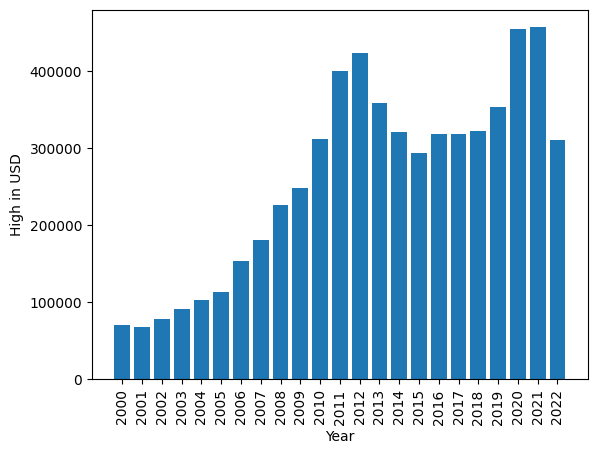

Year: 2021 had the highest High: 456432.1 USD



In [51]:
# find the year with the max High
high = df.groupby('Year').sum()['High']
year_max_high = high.idxmax()
max_high_value = high.loc[year_max_high]

# Plot the chart
year = range(2000,2022 + 1)
plt.bar(x=year, height=high)
plt.xticks(year, rotation = 90)
plt.xlabel('Year')
plt.ylabel('High in USD')

plt.show()
print(f"Year: {year_max_high} had the highest High: {max_high_value} USD\n")


    # The year with the lowest Low

C:\Users\Admin\AppData\Local\Temp\ipykernel_2236\570250339.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  low = df.groupby('Year').sum()['Low']


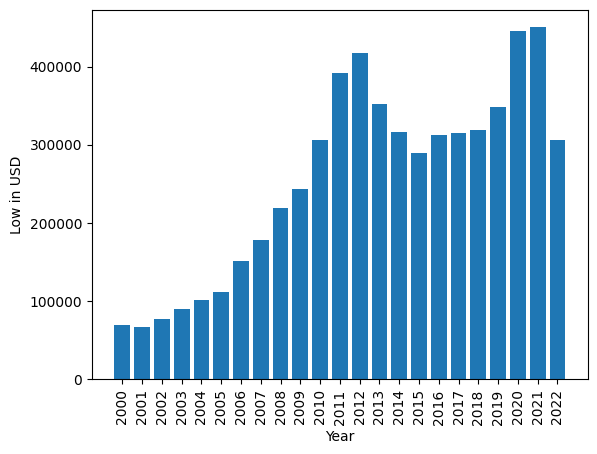

Year: 2001 had the lowest Low: 67091.5 USD



In [52]:
# find out the year with lowest low
low = df.groupby('Year').sum()['Low']
year_min_low = low.idxmin()
min_low_value = low.loc[year_min_low]

# plot the chart
plt.bar(x=year, height=low)
plt.xticks(year, rotation= 90)
plt.xlabel('Year')
plt.ylabel('Low in USD')
plt.show()
print(f'Year: {year_min_low} had the lowest Low: {min_low_value} USD\n')

    # The year with the largest/smallest volume

C:\Users\Admin\AppData\Local\Temp\ipykernel_2236\1068082742.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  volume = df.groupby('Year').sum()['Volume']


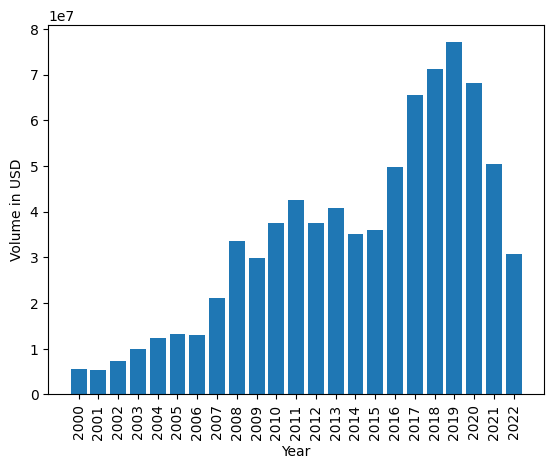

Year: 2019 had the largest volume: 77026754 USD



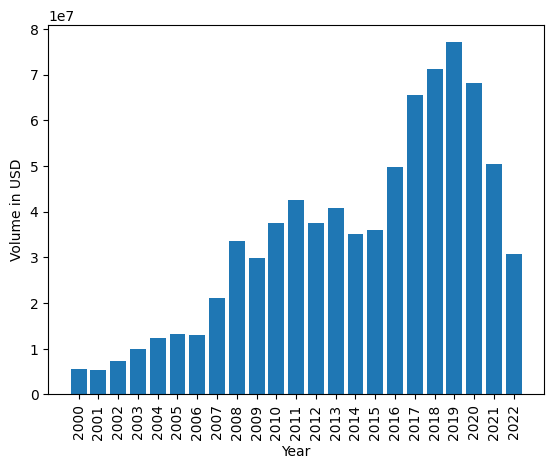

Year: 2001 had the largest volume: 5297652 USD



In [53]:
volume = df.groupby('Year').sum()['Volume']
year_max_volume = volume.idxmax()
max_volume_value = volume.loc[year_max_volume]

# plot
plt.bar(x=year, height=volume)
plt.xticks(year, rotation= 90)
plt.xlabel('Year')
plt.ylabel('Volume in USD')
plt.show()
print(f'Year: {year_max_volume} had the largest volume: {max_volume_value} USD\n')

year_min_volume = volume.idxmin()
min_volume_value = volume.loc[year_min_volume]

# plot
plt.bar(x=year, height=volume)
plt.xticks(year, rotation= 90)
plt.xlabel('Year')
plt.ylabel('Volume in USD')
plt.show()
print(f'Year: {year_min_volume} had the largest volume: {min_volume_value} USD\n')

relatiosnhip between high low and volume

C:\Users\Admin\AppData\Local\Temp\ipykernel_2236\339123290.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sum_each_year = df.groupby('Year').sum()


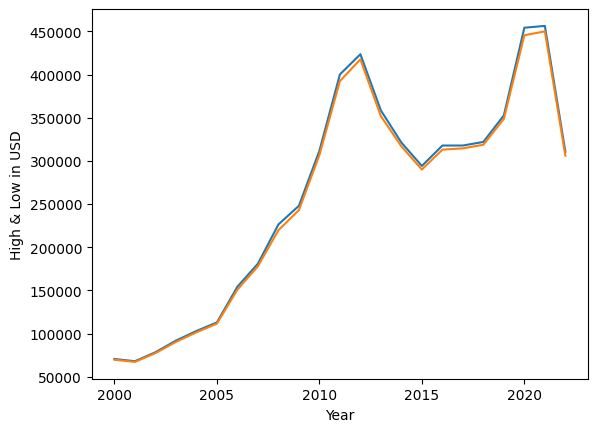

In [54]:
Sum_each_year = df.groupby('Year').sum()
high_all = Sum_each_year['High'].tolist()
low_all = Sum_each_year['Low'].tolist()
y = []
for i in range(2000,2023):
    y.append(i)
plt.plot(y,high_all)
plt.plot(y,low_all)
plt.xlabel('Year')
plt.ylabel('High & Low in USD')
plt.show()

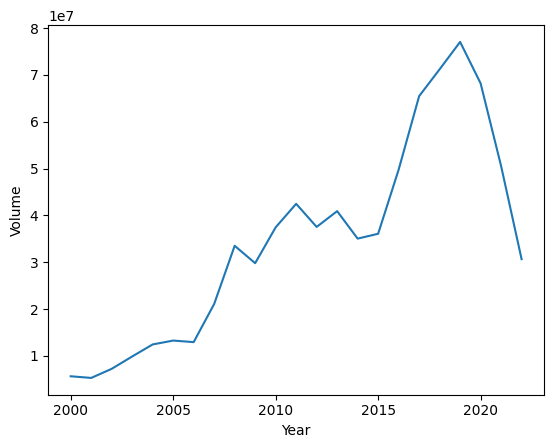

In [55]:
volume_all = Sum_each_year['Volume'].tolist()
plt.plot(y,volume_all)
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

Predict gold price

In [56]:
from prophet import Prophet
df_prophet = df[['Date', 'Close']]
# Prophet needs columns named 'ds' & 'y'
df_prophet.columns = ['ds','y']

# Splitting the data
split_date = df_prophet.index.max()-12*22
train_df, test_df = df_prophet.loc[df_prophet.index <= split_date].set_index(['ds']).copy(), df_prophet.loc[df_prophet.index > split_date].set_index(['ds']).copy()

# call & fit the model
model = Prophet()
model.fit(train_df.reset_index())

#  make the predictions
test_preds = model.predict(df=test_df.reset_index())
train_test_combined_df = train_df.join(test_preds.set_index(['ds'])[['yhat', 'yhat_lower', 'yhat_upper']], how = 'outer')

# # fit the model on the whole dataset
model = Prophet()
model.fit(df_prophet)

# Choose forecast window, 
future = model.make_future_dataframe(periods=12, freq='m')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

14:56:00 - cmdstanpy - INFO - Chain [1] start processing
14:56:06 - cmdstanpy - INFO - Chain [1] done processing
14:56:07 - cmdstanpy - INFO - Chain [1] start processing
14:56:14 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
5708,2023-04-30,2092.700297,1993.995332,2193.946933
5709,2023-05-31,2101.737191,1993.558558,2201.419001
5710,2023-06-30,2101.946250,2001.000688,2209.305313
5711,2023-07-31,2125.153403,2010.128275,2236.050606
5712,2023-08-31,2155.907061,2033.202400,2276.039167


Predictions perform

C:\Users\Admin\AppData\Local\Temp\ipykernel_2236\233541244.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yhat = data.groupby('YR').sum()['yhat']
C:\Users\Admin\AppData\Local\Temp\ipykernel_2236\233541244.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yhat_lower = data.groupby('YR').sum()['yhat_lower']
C:\Users\Admin\AppData\Local\Temp\ipykernel_2236\233541244.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
 

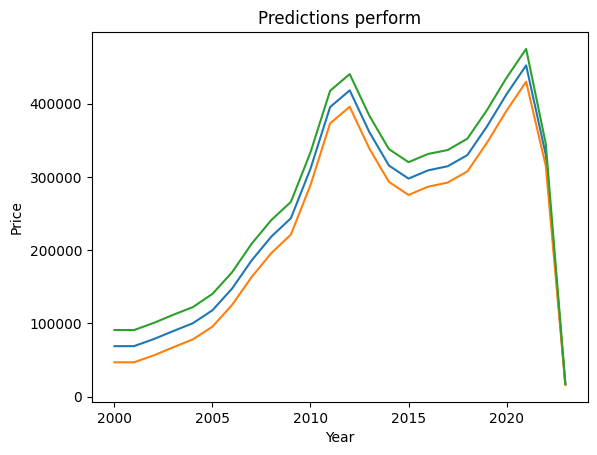

In [57]:
data = pd.DataFrame(forecast)
data['date'] = data['ds'].dt.date
data['YR'] = data['date'].astype(str).str[0:4]
yhat = data.groupby('YR').sum()['yhat']
yhat_lower = data.groupby('YR').sum()['yhat_lower']
yhat_upper = data.groupby('YR').sum()['yhat_upper']
y.append(2023)
plt.plot(y, yhat)
plt.plot(y, yhat_lower)
plt.plot(y, yhat_upper)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Predictions perform')
plt.show()